#### Explore different factors affecting people's enjoyment of food and/or cooking

Dataset Available at https://www.kaggle.com/hugodarwood/epirecipes

Over 20k recipes listed by recipe rating, nutritional information and assigned category (sparse).

So much has been said about Proteins, Carbs & Calories in recent years, that the single biggest challenge faced when trying to answer the question is how to "separate the wheat from the chaff." So, protein, carbohydrates and fats are nutrients your body uses and they all have calorie counts.  Too many and you get fat, to few and you starve.
'Fat' is actually the third 'Macronutrient' not calories. Fat is essential, and 'lubricates' many bodily functions, including things like cell membranes, vitamin absorption, nutrient transportation, and heat regulation.

Calories are simply a unit of measure for heat, and while something to consider, are not an essential macronutrient.



In [1]:
import numpy as np 
import pandas as pd 
pd.options.display.max_columns = 100
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline

import warnings
%config InlineBackend.figure_format = 'png' #set 'png' here when working on notebook
warnings.filterwarnings('ignore') 

We tweak the style of this notebook a little bit to have centered plots.

In [2]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

#### Loading all the data

In [4]:
data = pd.read_csv(r"C:\Users\piush\Desktop\Dataset\recipes-by-rating-and-nutrition\epi_r.csv")

###### Nutritional Information in Dairy v Dairy-Free Epicurious Recipes
Analysis of a Kaggle dataset of Epicurious recipes.

Firstly, we'll look at how the nutritional categories in the dataset - calories, fat, protein and sodium - relate to each other.

Secondly, we'll look at how these ingredients relate to each other when subsetting the dataset by dairy and dairy-free categories.

In [5]:
data.describe()

,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,advance prep required,alabama,alaska,alcoholic,almond,amaretto,anchovy,anise,anniversary,anthony bourdain,aperitif,appetizer,apple,apple juice,apricot,arizona,artichoke,arugula,asian pear,asparagus,aspen,atlanta,australia,avocado,back to school,backyard bbq,bacon,bake,banana,barley,basil,bass,bastille day,bean,beef,beef rib,beef shank,beef tenderloin,beer,beet,...,tree nut free,triple sec,tropical fruit,trout,tuna,turnip,utah,valentine's day,vanilla,veal,vegan,vegetable,vegetarian,venison,vermont,vermouth,vinegar,virginia,vodka,waffle,walnut,wasabi,washington,"washington, d.c.",watercress,watermelon,wedding,weelicious,west virginia,westwood,wheat/gluten-free,whiskey,white wine,whole wheat,wild rice,windsor,wine,winter,wisconsin,wok,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
count,20052.000000,1.593500e+04,15890.000000,1.586900e+04,1.593300e+04,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,...,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.00000,20052.000000,20052.000000,20052.00000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000
mean,3.714467,6.322958e+03,100.160793,3.468775e+02,6.225975e+03,0.000299,0.000050,0.000848,0.001346,0.000349,0.005436,0.000150,0.000100,0.041642,0.029124,0.001945,0.002244,0.005785,0.005536,0.000100,0.000598,0.068422,0.033214,0.000299,0.013415,0.000399,0.007630,0.013864,0.000997,0.010323,0.000050,0.000349,0.000349,0.013615,0.010074,0.046778,0.029274,0.220078,0.008827,0.002494,0.028177,0.004488,0.001496,0.028775,0.040445,0.002793,0.000698,0.003591,0.005585,0.010473,...,0.351287,0.003990,0.003092,0.002693,0.006683,0.004588,0.000150,0.01162,0.013315,0.006134,0.09231,0.104079,0.341412,0.000449,0.000249,0.000549,0.032815,0.000549,0.006234,0.000050,0.021195,0.001147,0.001297,0.000499,0.006882,0.003591,0.005585,0.001646,0.000050,0.000050,0.244664,0.002843,0.024287,0.001496,0.000898,0.000050,0.009525,0.154548,0.000199,0.005087,0.001247,0.026332,0.000050,0.000299,0.014861,0.000150,0.000349,0.001396,0.000948,0.022741
std,1.340829,3.590460e+05,3840.318527,2.045611e+04,3.333182e+05,0.017296,0.007062,0.029105,0.036671,0.018681,0.073530,0.012231,0.009987,0.199774,0.168159,0.044060,0.047321,0.075840,0.074197,0.009987,0.024456,0.252475,0.179198,0.017296,0.115047,0.019971,0.087019,0.116929,0.031567,0.101080,0.007062,0.018681,0.018681,0.115888,0.099864,0.211169,0.168577,0.414309,0.093539,0.049874,0.165482,0.066846,0.038652,0.167178,0.197005,0.052774,0.026415,0.059816,0.074529,0.101802,...,0.477384,0.063039,0.055521,0.051825,0.081476,0.067581,0.012231,0.10717,0.114624,0.078082,0.28947,0.305371,0.474195,0.021181,0.015789,0.023416,0.178156,0.023416,0.078710,0.007062,0.144037,0.033849,0.035986,0.022327,0.082675,0.059816,0.074529,0.040535,0.007062,0.007062,0.429898,0.053242,0.153942,0.038652,0.029948,0.007062,0.097134,0.361482,0.014123,0.071

###### Observations
Calling describe() on any data set is always instructive. In this case we notice:
1. 679 columns is a considerable amount of columns. There can be too much of a good thing.
2. Some 20% of the nutrition (calories, protein, fat, sodium) data is missing. It's a pity, but by no means a crisis.

###### Nutritional Information
Firstly, we'll draw some boxplots of the nutritional information. The boxplot is the most eloquent of all charts when it comes to data distribution.

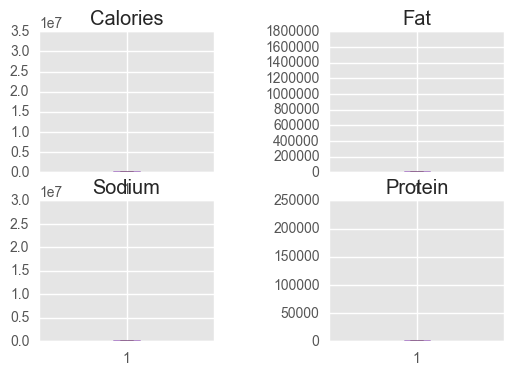

In [6]:
%matplotlib inline
nutrition = [['calories', 'fat'], ['sodium', 'protein']]
fig, ax = plt.subplots(2, 2)
for firstN in range(2):
    for secondN in range(2):
        temp = data[nutrition[firstN][secondN]]
        temp = temp.dropna()
        ax[firstN, secondN ].boxplot(temp)
        ax[firstN, secondN].set_title(nutrition[firstN][secondN].title())
plt.subplots_adjust(wspace = .66)

While eloquent, the box plot isn't perfect. This hasn't worked out very well at all. The presence of outliers in all four categories has crushed the boxes that display the inter-quantile range entirely,, leaving only outlier values that tell us nothing. As such, we'll have to make some adjustments. Firstly, we'll see just how far the outliers actually lie.

In [7]:
data[['calories', 'fat', 'sodium', 'protein']].describe()

,calories,fat,sodium,protein
count,1.593500e+04,1.586900e+04,1.593300e+04,15890.000000
mean,6.322958e+03,3.468775e+02,6.225975e+03,100.160793
std,3.590460e+05,2.045611e+04,3.333182e+05,3840.318527
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,1.980000e+02,7.000000e+00,8.000000e+01,3.000000
50%,3.310000e+02,1.700000e+01,2.940000e+02,8.000000
75%,5.860000e+02,3.300000e+01,7.110000e+02,27.000000
max,3.011122e+07,1.722763e+06,2.767511e+07,236489.000000


The maxima of the values are hugely out of proportion to the rest. The standard practice in these cases is to limit the upper limit to one-and-one-half times the 75th percentile, so we'll go with that here. We'll also make a bigger plot, and plot the four values side-by-side, each scaled on the same axis, for greater clarity.

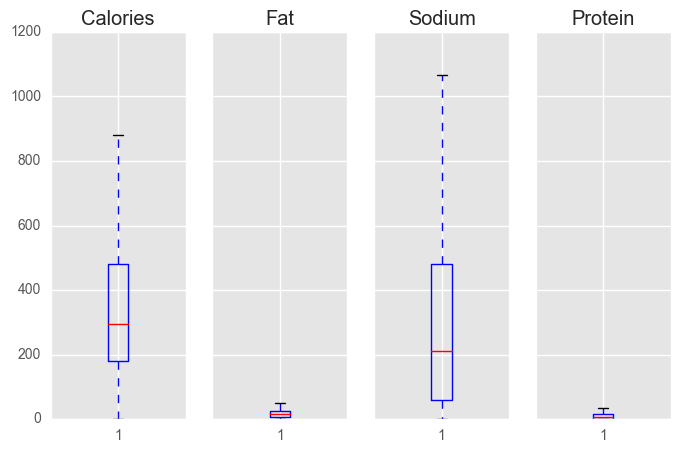

In [14]:
nutrition = ['calories', 'fat', 'sodium', 'protein']
fig, ax = plt.subplots(1,4, sharey=True, figsize = (8, 5))
for i in range(4):
    temp = data[nutrition[i]]
    temp = temp.dropna()
    temp = temp[temp<=temp.quantile(0.75)*1.5]
    ax[i].boxplot(temp)
    ax[i].set_title(nutrition[i].title())

Observations The dishes in the dataset contain considerably more calories and sodium than they do fat or protein. Let's look at how each nutrient scales against each of the others, by making six scatter plots.

###### Common charting libraries

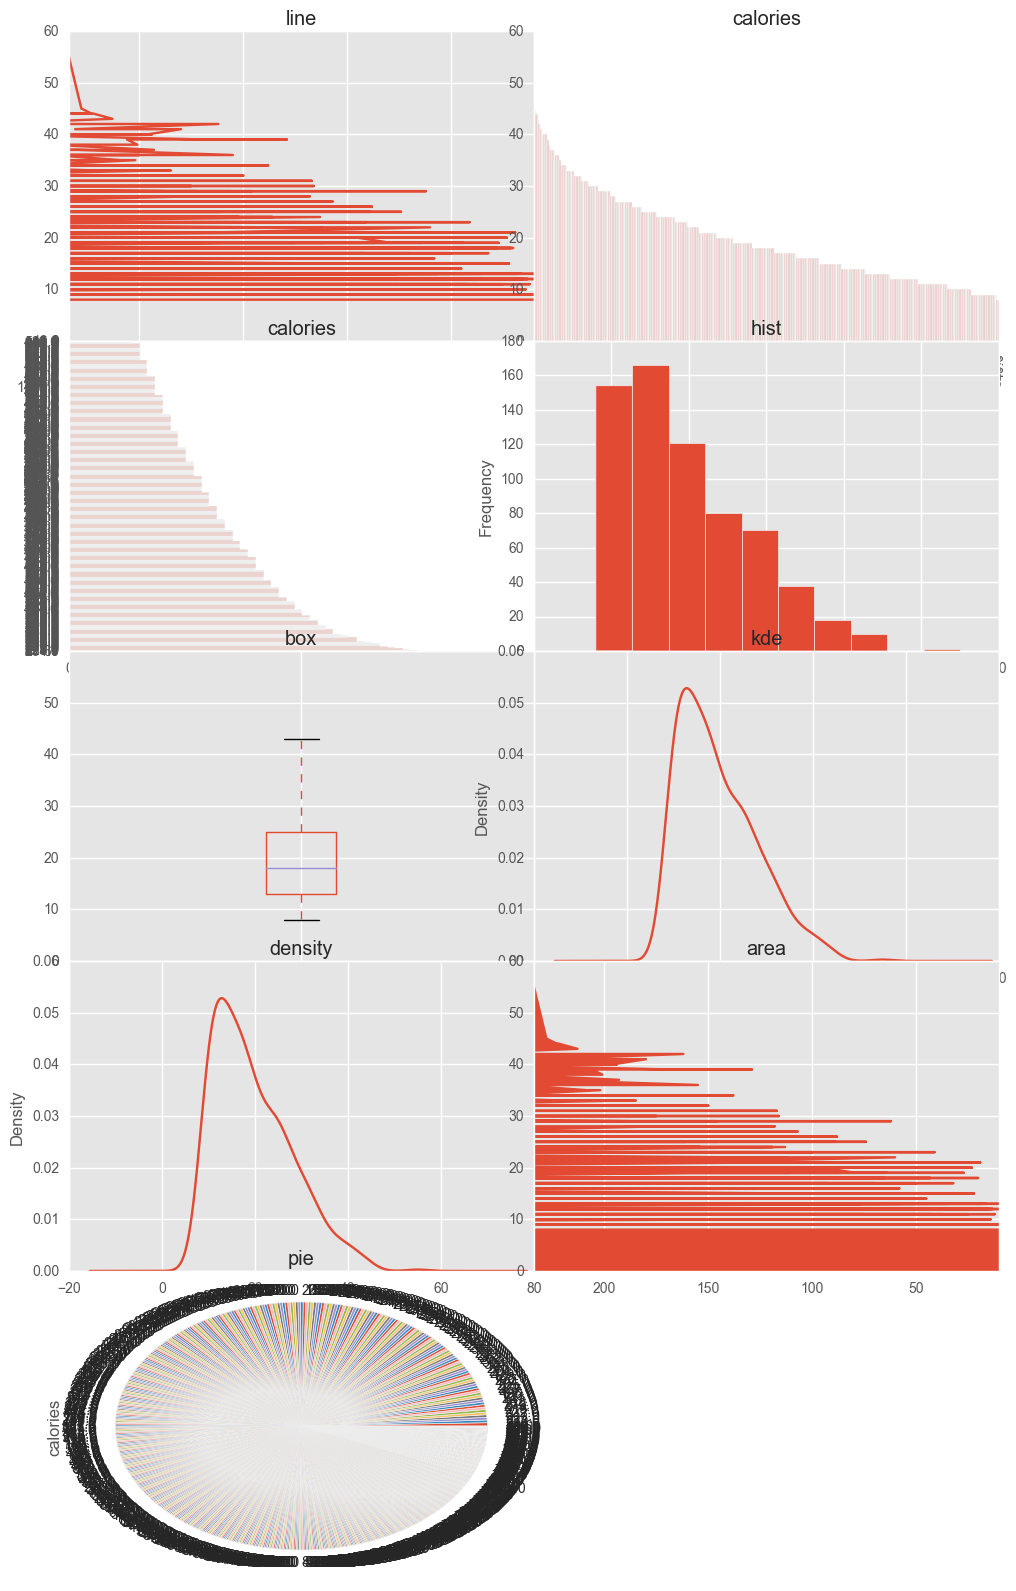

In [13]:
plt.rcParams['figure.figsize'] = (12.0, 20.0)
plt.subplots_adjust(wspace=0, hspace=0)

k = ['line','bar','barh','hist','box','kde','density','area','pie'] #'scatter','hexbin']
data1 = data['calories'].value_counts()[:10]
for i in range(len(k)):
    ax = plt.subplot(5, 2, i+1).set_title(k[i])
   
    data1.plot(kind=k[i], subplots=True)

###### Nutrient V Nutrient

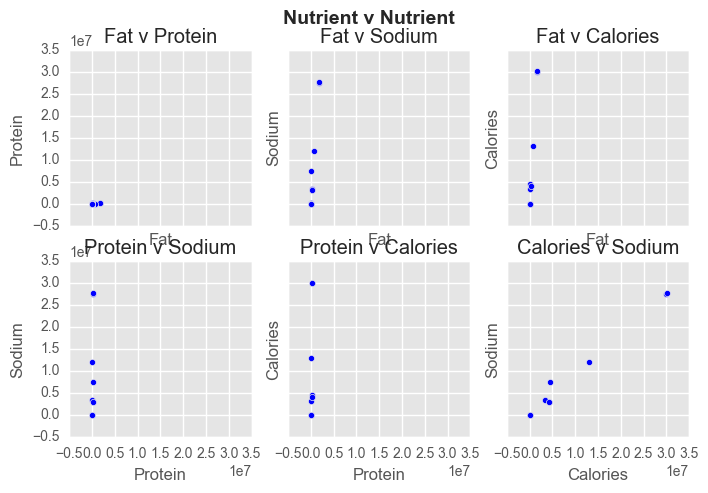

In [15]:
fig, ax = plt.subplots(2, 3, sharex=True, sharey=True, figsize = (8, 5))
plt.suptitle('Nutrient v Nutrient', fontweight = 'bold', fontsize = 14)
nutrient_v_nutrient = [['fat', 'protein'],
                       ['fat', 'sodium'],
                       ['fat', 'calories'],
                       ['protein', 'sodium'],
                       ['protein', 'calories'],
                       ['calories', 'sodium']]
counter_x = 0
counter_y = 0

for pairing in nutrient_v_nutrient:
    temp = data[pairing]
    ax[counter_x, counter_y].scatter(temp[pairing[0]].values, temp[pairing[1]].values)
    ax[counter_x, counter_y].set_xlabel(pairing[0].title())
    ax[counter_x, counter_y].set_ylabel(pairing[1].title())
    current_title = " v ".join([pairing[0].title(), pairing[1].title()])
    ax[counter_x, counter_y].set_title(current_title)

    counter_y += 1
    if counter_y > 2:
        counter_y = 0
        counter_x += 1


Observations There's a clear linear relationship between sodium and calories, which is to be expected. The other data are less satisfactory.

Therefore, we will create six more plots, but this time with the data scaled between 0 and 1 to make relationships between each more clear. We'll also color the markers red, lower their opacity and increase their size, all in the name of presenting a clearer picture of the relationship between the different nutrients.

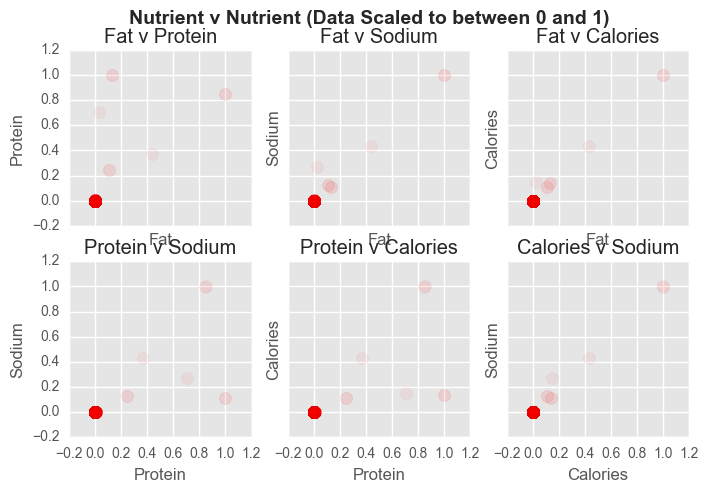

In [16]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
counter_x = 0
counter_y = 0

fig, ax = plt.subplots(2, 3, sharex=True, sharey=True, figsize = (8, 5))
plt.suptitle('Nutrient v Nutrient (Data Scaled to between 0 and 1)', fontweight = 'bold', fontsize = 14)

for pairing in nutrient_v_nutrient:
    temp = data[pairing].dropna()
    x_scaled = scaler.fit_transform(temp[pairing[0]].values.reshape(-1, 1))
    y_scaled = scaler.fit_transform(temp[pairing[1]].values.reshape(-1, 1))
#     The latest version of MinMaxScaler() demains the data be reshaped

    ax[counter_x, counter_y].scatter(x_scaled,
                                     y_scaled,
                                     color = 'red',
                                     s = 75,
                                    alpha = 0.05)
    ax[counter_x, counter_y].set_xlabel(pairing[0].title())
    ax[counter_x, counter_y].set_ylabel(pairing[1].title())
    current_title = " v ".join([pairing[0].title(), pairing[1].title()])
    ax[counter_x, counter_y].set_title(current_title)

    counter_y += 1
    if counter_y > 2:
        counter_y = 0
        counter_x += 1

###### Observations
1. We can see two clearly linear relationships - between calories and sodium, and calories and fat - and one not-quite-as-clear-but-still, between fat and sodium. The other three relationships, protein versus the other three, are random.
2. The lessened opacity in the scatter plot has made it obvious that the majority of the data in each relationship are at the very low end of the scale. It seems odd that the data are so bunched in one area, and not more evenly dispersed. What could be the reason behind it?
###### Those 679 Columns
It's time to have a closer look at those 679 columns. Intuitively, they must be ingredients, but there may be other categories mixed in there. To investigate, we'll
1. Make a list from the columns
2. Use a defaultdict to count up the number of 1's in each column
3. Use that dictionary to find out which columns are the most active.

In [17]:
from collections import defaultdict
ingredients = data.columns
counter = defaultdict(int)
for i in ingredients:
    try: # to escape errors where the values aren't of type(int)
        temp = data[data[i] > 0].copy() # to avoid the a changed-values-of-original error
        counter[i] = len(temp)
    except:
        pass
    
counterCounter = list(counter.values())

counterCounter.sort(reverse=True)
for c in counterCounter[:30]:
    for key, value in counter.items():
        if value == c:
            print ("{:<19}{:,}".format(key, value))

rating             18,216
calories           15,922
sodium             15,872
protein            15,039
fat                14,646
bon appétit        9,355
peanut free        8,390
soy free           8,088
tree nut free      7,044
vegetarian         6,846
gourmet            6,648
kosher             6,175
pescatarian        6,042
quick & easy       5,372
wheat/gluten-free  4,906
bake               4,413
summer             4,151
dessert            3,573
dairy free         3,206
side               3,151
no sugar added     3,132
winter             3,099
fall               3,015
dinner             2,705
sugar conscious    2,466
healthy            2,351
kidney friendly    2,313
onion              2,238
tomato             2,140
vegetable          2,087


Our hopes for a clean list of categories are dashed. But all is not lost however - the presence of categories in columns means that we can subset the data by category, and compare nutrient levels against each other by those categories.
###### Dairy v Dairy-Free Recipes
Dairy versus dairy-free recipes are an obvious comparison - how do the nutrients adjust when dairy products are present or absent? We'll subset the data and compare nutrient v nutrient, dairy v dairy-free.

We'll do this by creating a chart of two columns with six rows each, the dairy plots on the left-hand-side and the dairy-free on the right.

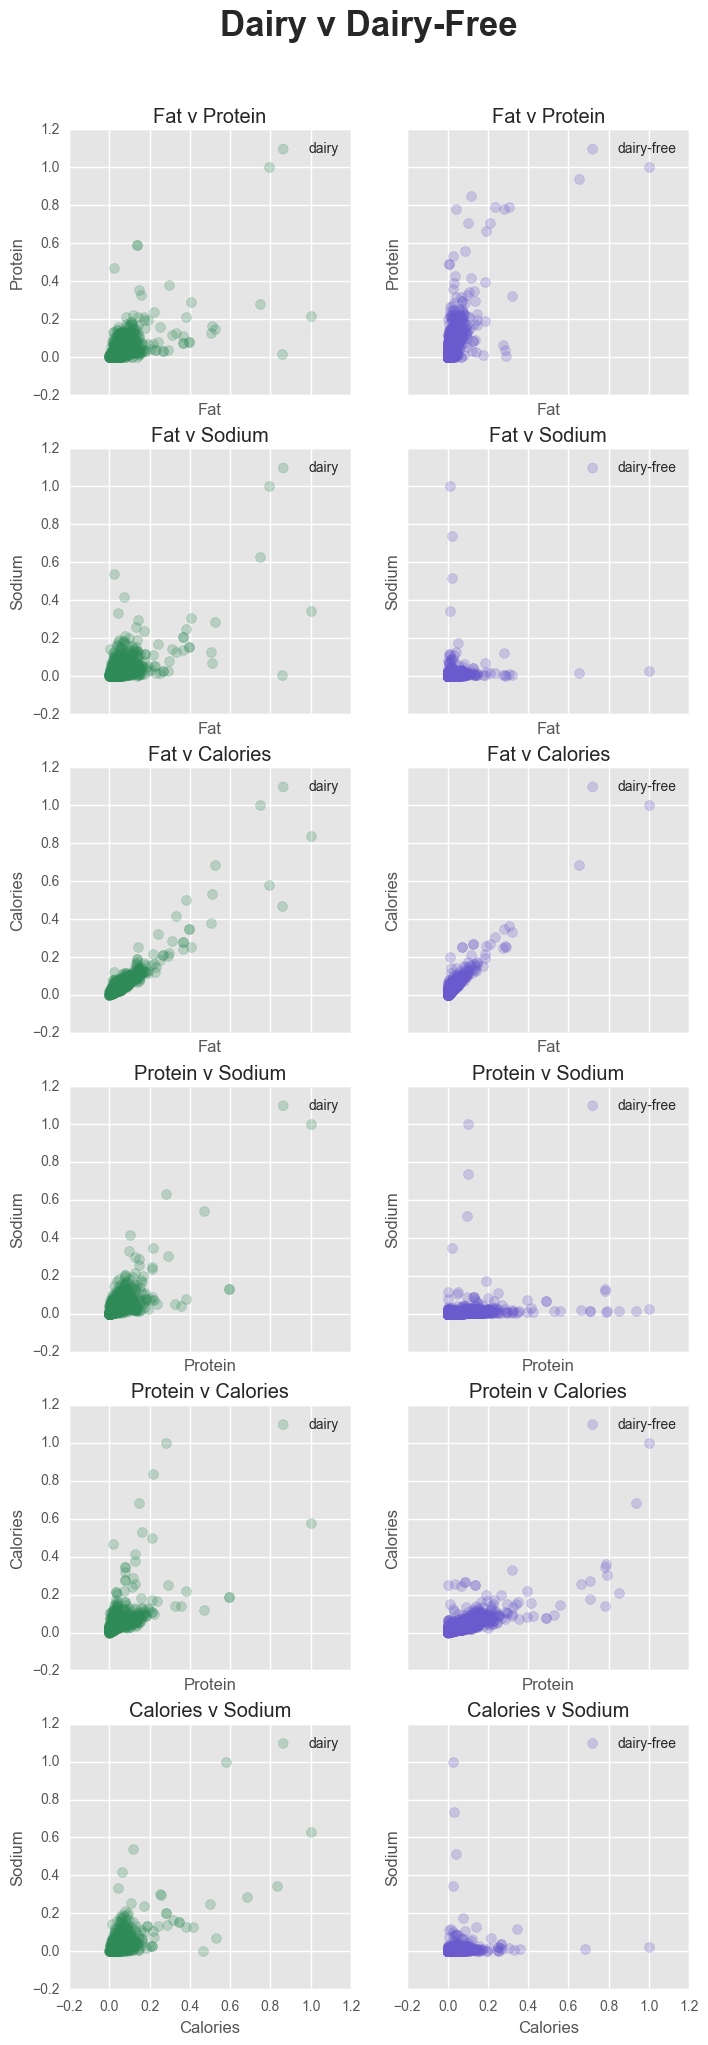

In [18]:
fig, ax = plt.subplots(6, 2, sharex=True, sharey=True, figsize = (8, 24))
plt.suptitle('Dairy v Dairy-Free', fontsize = 25, fontweight='bold', y = 0.95)

counter_x = 0
counter_y = 0

for pairing in nutrient_v_nutrient:
    temp = data[data['dairy'] == 1].copy()
    temp = temp[pairing]
    temp = temp.dropna()
    x_scaled = scaler.fit_transform(temp[pairing[0]].values.reshape(-1, 1))
    y_scaled = scaler.fit_transform(temp[pairing[1]].values.reshape(-1, 1))

    ax[counter_x, counter_y].scatter(x_scaled,
                                     y_scaled,
                                     color = 'seagreen',
                                     s = 50,
                                    alpha = 0.25,
                                    label = 'dairy')
    ax[counter_x, counter_y].set_xlabel(pairing[0].title())
    ax[counter_x, counter_y].set_ylabel(pairing[1].title())
    current_title = " v ".join([pairing[0].title(), pairing[1].title()])
    ax[counter_x, counter_y].set_title(current_title)
    ax[counter_x, counter_y].legend()

    counter_x += 1
    
counter_y = 1
counter_x = 0



for pairing in nutrient_v_nutrient:
    temp = data[data['dairy free'] == 1].copy()
    temp = temp.dropna()
    temp = temp[pairing]
    x_scaled = scaler.fit_transform(temp[pairing[0]].values.reshape(-1, 1))
    y_scaled = scaler.fit_transform(temp[pairing[1]].values.reshape(-1, 1))

    ax[counter_x, counter_y].scatter(x_scaled,
                                     y_scaled,
                                     color = 'slateblue',
                                     s = 50,
                                    alpha = 0.25,
                                    label = 'dairy-free')
    ax[counter_x, counter_y].set_xlabel(pairing[0].title())
    ax[counter_x, counter_y].set_ylabel(pairing[1].title())
    current_title = " v ".join([pairing[0].title(), pairing[1].title()])
    ax[counter_x, counter_y].set_title(current_title)
    ax[counter_x, counter_y].legend()
    counter_x += 1

##### Let's explore the taste of foodies .
1. What is the relation between rating and calorie of the recipes?
2. Will there be any correlation between Nutrition features and Rating's of Recipes?
3. What is the composition of vegetarian and non-vegetarian recipes in 5 start rating?
4. What are common fruits used in 5 stars rated recipes?

In [19]:
#Pandas allows you to have a sneak peak at your data.
train.head(5)


,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,advance prep required,alabama,alaska,alcoholic,almond,amaretto,anchovy,anise,anniversary,anthony bourdain,aperitif,appetizer,apple,apple juice,apricot,arizona,artichoke,arugula,asian pear,asparagus,aspen,atlanta,australia,avocado,back to school,backyard bbq,bacon,bake,banana,barley,basil,bass,bastille day,bean,beef,beef rib,beef shank,beef tenderloin,beer,...,tree nut free,triple sec,tropical fruit,trout,tuna,turnip,utah,valentine's day,vanilla,veal,vegan,vegetable,vegetarian,venison,vermont,vermouth,vinegar,virginia,vodka,waffle,walnut,wasabi,washington,"washington, d.c.",watercress,watermelon,wedding,weelicious,west virginia,westwood,wheat/gluten-free,whiskey,white wine,whole wheat,wild rice,windsor,wine,winter,wisconsin,wok,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


As the dataset is with lots of sparse data, we will just analyze recipes with nutrion values such as calories,proteins,fat,sodium and ratings

In [17]:
df = train.iloc[:,0:6]

In [20]:
df.head(2)

,title,rating,calories,protein,fat,sodium
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0


In [21]:
import re
missing_values = []
nonumeric_values = []

print ("TRAINING SET INFORMATION")
print ("========================\n")

for column in train:
    # Find all the unique feature values
    uniq = train[column].unique()
    print ("'{}' has {} unique values" .format(column,uniq.size))
    if (uniq.size > 10):
        print("~~Listing up to 10 unique values~~")
    print (uniq[0:10])
    print ("\n-----------------------------------------------------------------------\n")
    
    # Find features with missing values
    if (True in pd.isnull(uniq)):
        s = "{} has {} missing" .format(column, pd.isnull(train[column]).sum())
        missing_values.append(s)
    
    # Find features with non-numeric values
    for i in range (1, np.prod(uniq.shape)):
        if (re.match('nan', str(uniq[i]))):
            break
        if not (re.search('(^\d+\.?\d*$)|(^\d*\.?\d+$)', str(uniq[i]))):
            nonumeric_values.append(column)
            break
  
print ("\n~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n")
print ("Features with missing values:\n{}\n\n" .format(missing_values))
print ("Features with non-numeric values:\n{}" .format(nonumeric_values))


TRAINING SET INFORMATION

'title' has 17736 unique values
~~Listing up to 10 unique values~~
['Lentil, Apple, and Turkey Wrap '
 'Boudin Blanc Terrine with Red Onion Confit '
 'Potato and Fennel Soup Hodge ' 'Mahi-Mahi in Tomato Olive Sauce '
 'Spinach Noodle Casserole ' 'The Best Blts '
 'Ham and Spring Vegetable Salad with Shallot Vinaigrette '
 'Spicy-Sweet Kumquats ' 'Korean Marinated Beef '
 'Ham Persillade with Mustard Potato Salad and Mashed Peas ']

-----------------------------------------------------------------------

'rating' has 8 unique values
[ 2.5    4.375  3.75   5.     3.125  1.875  0.     1.25 ]

-----------------------------------------------------------------------

'calories' has 1859 unique values
~~Listing up to 10 unique values~~
[ 426.  403.  165.   nan  547.  948.  170.  602.  256.  766.]

-----------------------------------------------------------------------

'protein' has 283 unique values
~~Listing up to 10 unique values~~
[ 30.  18.   6.  nan  20.  19.  

Calories,protein,fat and sodium have almost same missing values. Let us explore these

In [31]:
#Find integer index of rows with NaN in pandas
pd.isnull(df).any(1).nonzero()[0]

array([    3,     6,     7, ..., 20026, 20035, 20042], dtype=int64)

In [36]:
#Check when a value in a cloumn is NaN
caloriesNan = df[pd.isnull(df).any(axis=1)]

In [37]:
caloriesNan

,title,rating,calories,protein,fat,sodium
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN
6,Ham and Spring Vegetable Salad with Shallot Vi...,4.375,NaN,NaN,NaN,NaN
7,Spicy-Sweet Kumquats,3.750,NaN,NaN,NaN,NaN
11,Spicy Noodle Soup,4.375,NaN,NaN,NaN,NaN
21,"""Fried"" Chicken",3.750,NaN,NaN,NaN,NaN
22,Fish Fillets in Parchment with Asparagus and O...,3.750,NaN,NaN,NaN,NaN
23,Pancetta and Taleggio Lasagna with Treviso,3.750,NaN,NaN,NaN,NaN
30,Asian Steak Topped with Bell Pepper Stir-Fry,4.375,NaN,NaN,NaN,NaN
31,Moroccan-Style Preserved Lemons,5.000,NaN,NaN,NaN,NaN
34,Fontina Mac with Squash and Sage,5.000,NaN,NaN,NaN,NaN


Looking at some of the NaN columns such as Scoth Cooler,Fish Brine and others, it looks like all have the same rows. so we will drop these rows. Also we will explore where the ratings is zero.

In [38]:
df = df.dropna()

In [40]:
df.shape

(15864, 6)

In [42]:
dfRatingZero = df[(df['rating'] == 0)]

In [47]:
dfRatingZero.count()

title       1296
rating      1296
calories    1296
protein     1296
fat         1296
sodium      1296
dtype: int64

There are 1296 with zero ratings. The recipes have very high quantity of salt and very high calories.

#### Plotting univariate distributions

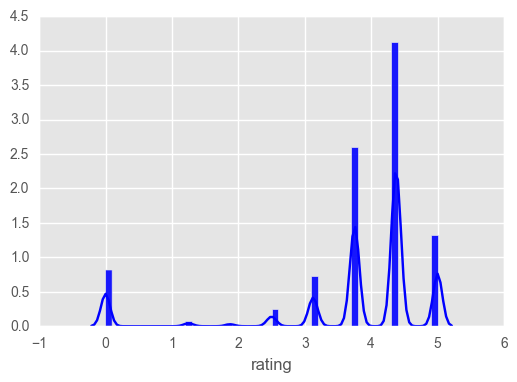

In [57]:
sns.distplot(df['rating'], kde = True, color = 'b', hist_kws={'alpha': 0.9})

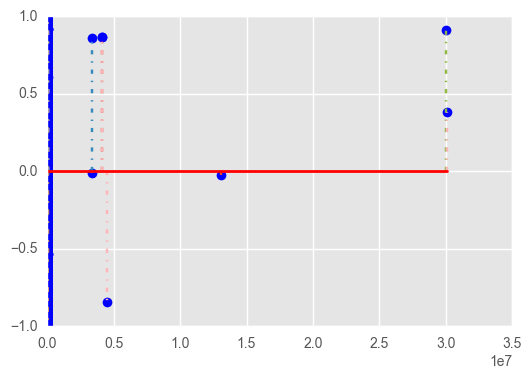

In [64]:
#stem and leaf plot
markerline, stemlines, baseline = plt.stem(df['calories'], np.cos(df['calories']), '-.')
plt.setp(markerline, 'markerfacecolor', 'b')
plt.setp(baseline, 'color', 'r', 'linewidth', 2)

plt.show()

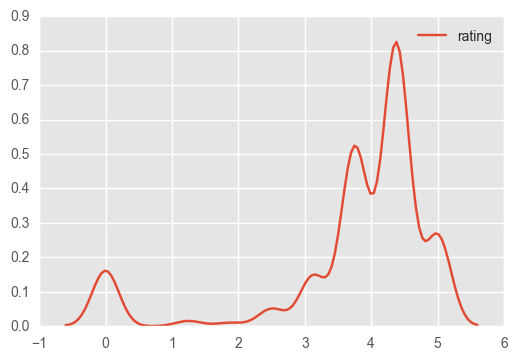

In [69]:
sns.kdeplot(df['rating'], bw=0.2)

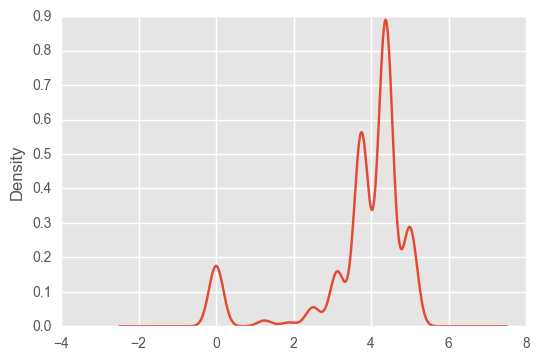

In [71]:
df['rating'].plot(kind='density')

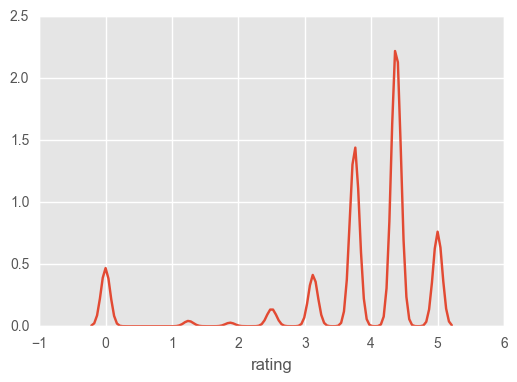

In [73]:
sns.distplot(df['rating'], hist=False)

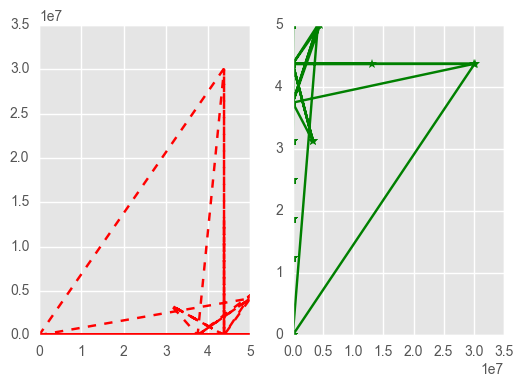

In [77]:
from pylab import *
subplot(1,2,1)
plot(df['rating'], df['calories'], 'r--')
subplot(1,2,2)
plot(df['calories'], df['rating'], 'g*-')

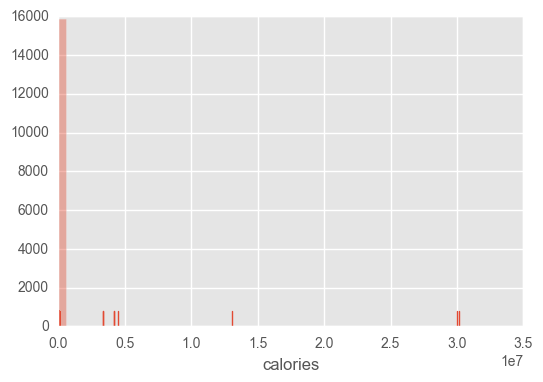

In [79]:
sns.distplot(df['calories'],kde = False,rug=True)

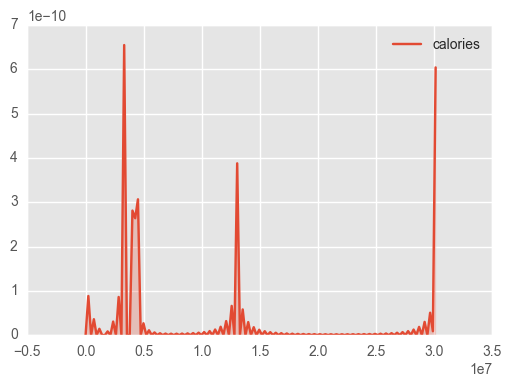

In [80]:
sns.kdeplot(df['calories'], shade=True);

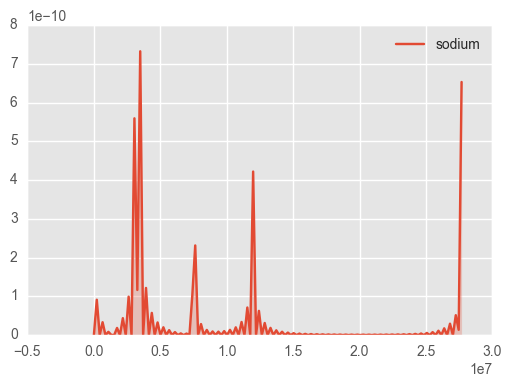

In [139]:
sns.kdeplot(df['sodium'], shade=True);

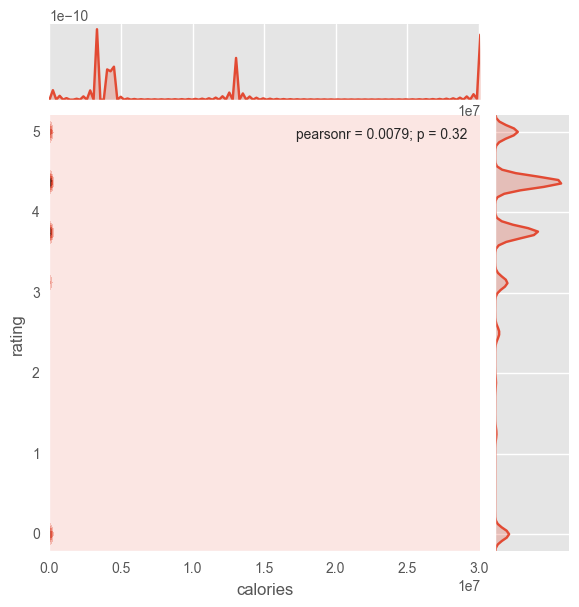

In [84]:
sns.jointplot(x= "calories", y="rating", data=df, kind="kde");

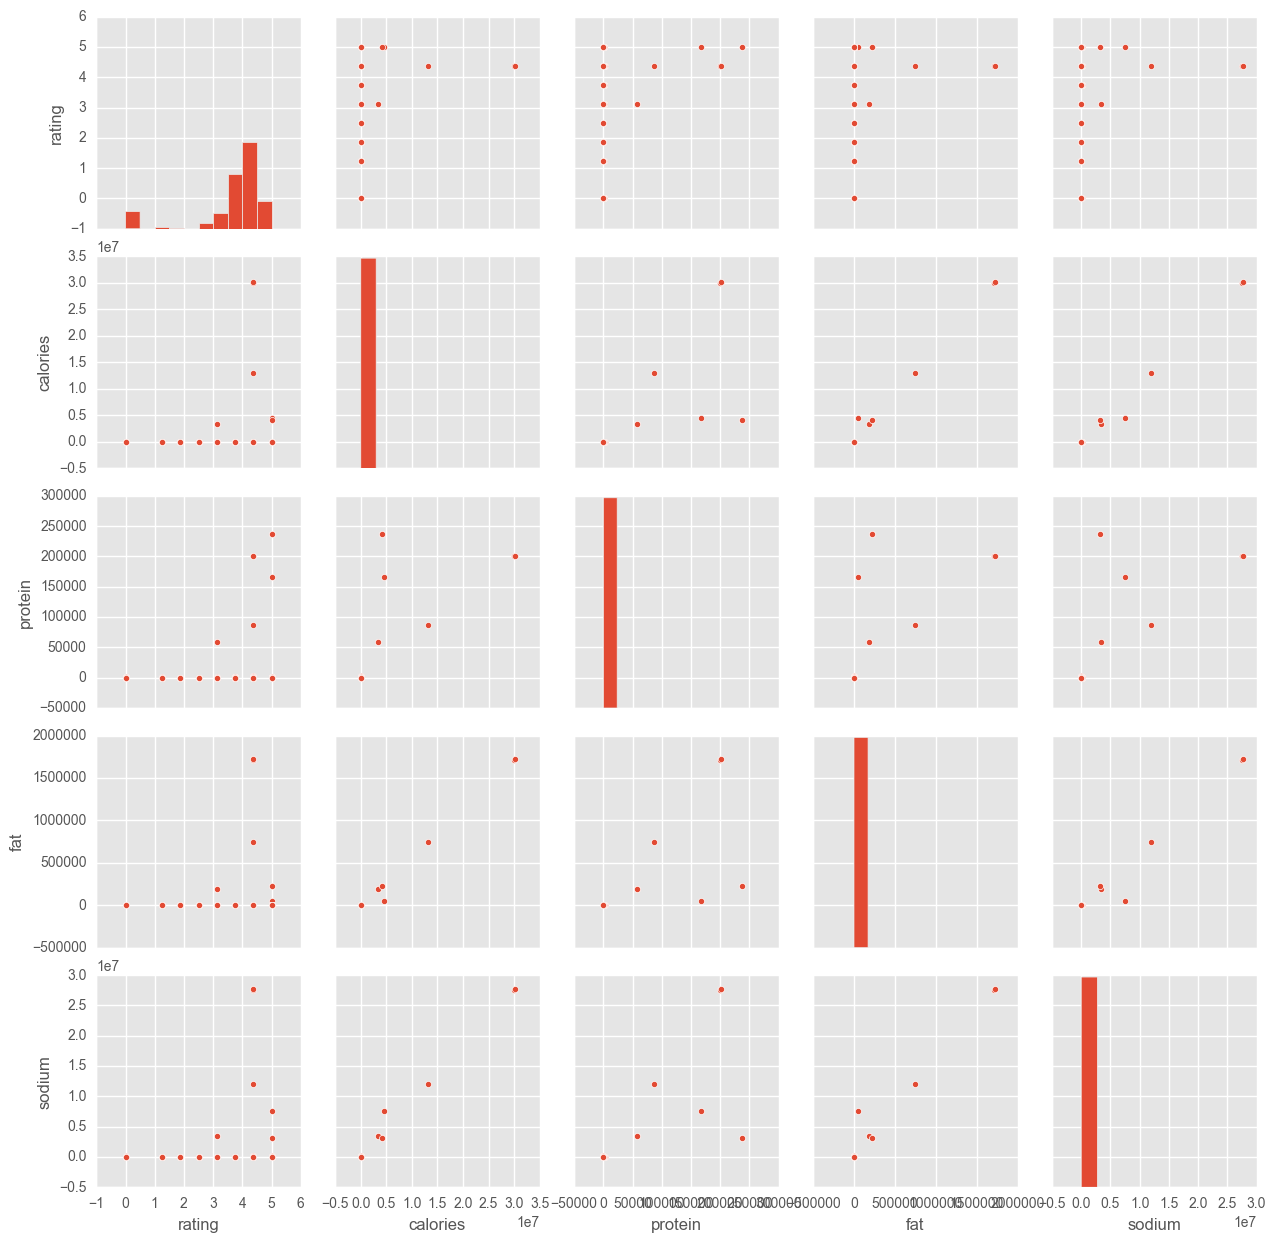

In [85]:
sns.pairplot(df)

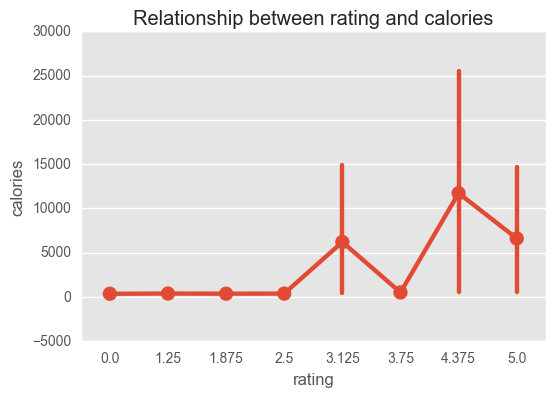

In [87]:
ax=sns.pointplot(x="rating",y="calories", data= df)
ax.set(ylabel='calories')
plt.title("Relationship between rating and calories")

The recipes with 4.375 has higher calories when compared to best rating 5. So recipes with more calories get's rating around 4 than getting 5.


The rating seems to be aggregated as it has has 8 unique values :

[ 2.5    4.375  3.75   5.     3.125  1.875  0.     1.25 ]

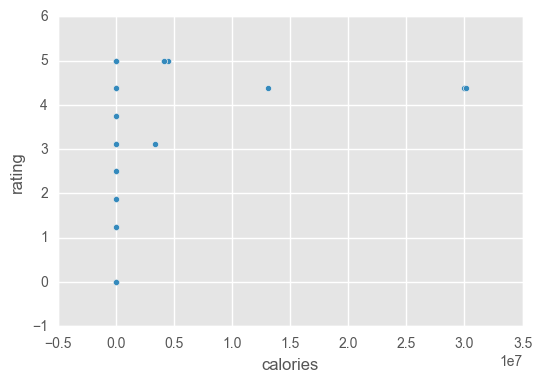

In [160]:
df.plot(kind="scatter",     # Create a scatterplot
              x= "calories",          # Put protein on the x axis
              y= "rating")         # Put calories on the y axis

I might think that this plot shows a correlation, because I can clearly put a line through the dots. But the line would be verticle at 0 , thus having a slope value of zero. These dots actually show that whatever is being measured on the x-axis has no bearing on whatever is being measured on the y-axis, because the value of x has no affect on the value of y. So even though I could draw a line through these points, this scatterplot still shows no correlation.

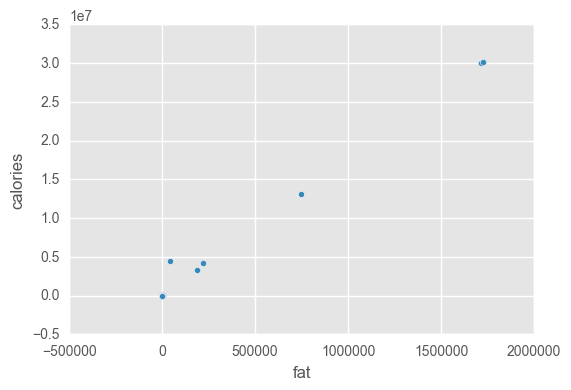

In [102]:
df.plot(kind="scatter",     # Create a scatterplot
              x= "fat",          
              y= "calories")         

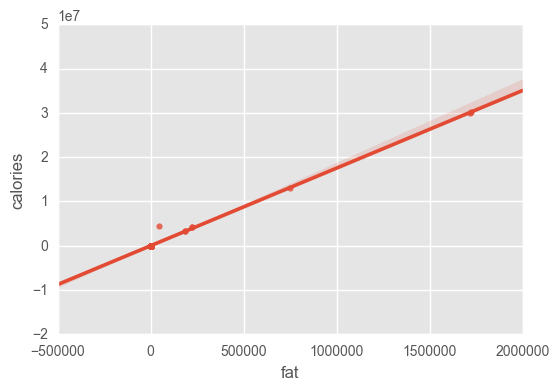

In [105]:
ax = sns.regplot(x="fat", y="calories", data= df,x_jitter=.6)

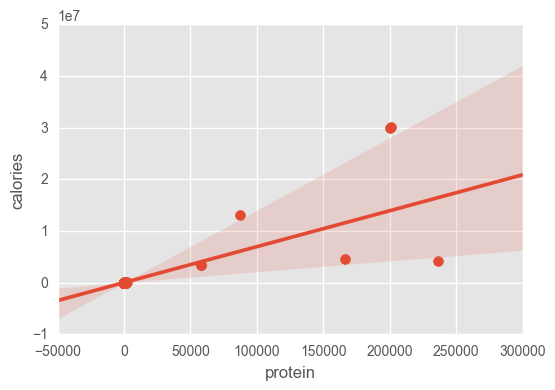

In [109]:
ax = sns.regplot(x="protein", y="calories", data= df,x_estimator=np.mean)

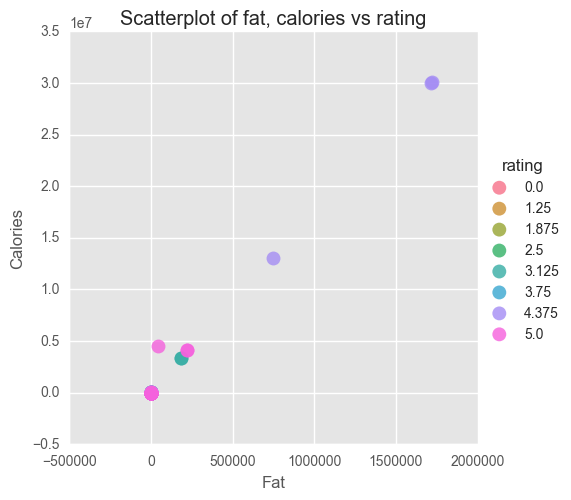

In [114]:
sns.lmplot('fat', 'calories', 
           data=df, 
           fit_reg=False, 
           #dropna=True,
           hue="rating",  
           scatter_kws={"marker": "D", 
                        "s": 100})
plt.title('Scatterplot of fat, calories vs rating')
plt.xlabel('Fat')
plt.ylabel('Calories')

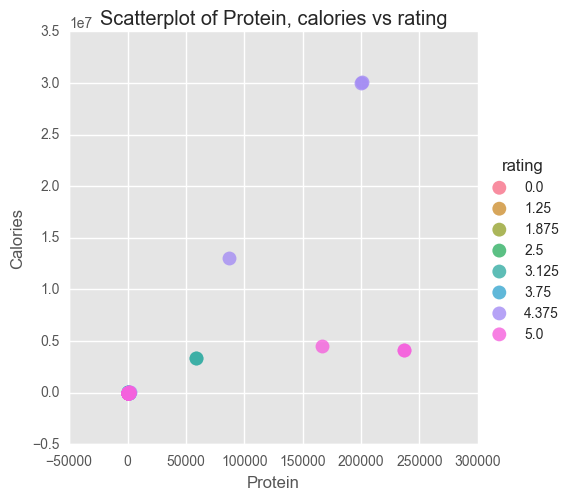

In [120]:
sns.lmplot('protein', 'calories', 
           data=df, 
           fit_reg=False, 
           #dropna=True,
           hue="rating",  
           scatter_kws={"marker": "D", 
                        "s": 100})
plt.title('Scatterplot of Protein, calories vs rating')
plt.xlabel('Protein')
plt.ylabel('Calories')

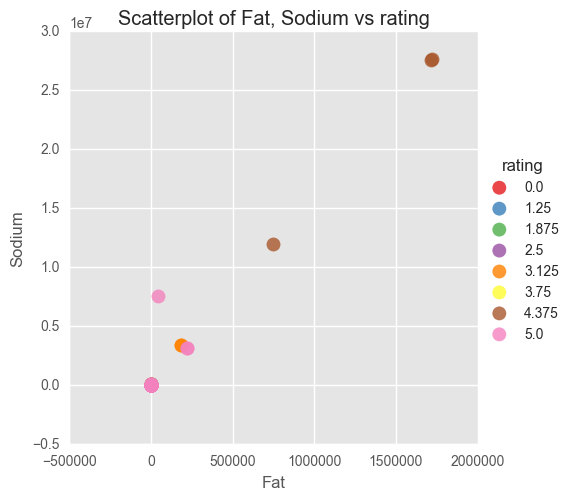

In [134]:
sns.lmplot('fat', 'sodium', 
           data=df, 
           fit_reg=False, 
           palette="Set1",           
           hue="rating",
           scatter_kws={"marker": "D", 
                        "s": 100})
plt.title('Scatterplot of Fat, Sodium vs rating')
plt.xlabel('Fat')
plt.ylabel('Sodium')

In [142]:
df[(df['sodium'] > 6252)].count()

title       135
rating      135
calories    135
protein     135
fat         135
sodium      135
dtype: int64

In [148]:
df[(df['sodium'] > 6500)]

,title,rating,calories,protein,fat,sodium
255,Cider-Braised Pheasant with Pearl Onions and A...,3.750,1296.0,120.0,70.0,11779.0
263,Crab-Boil Spices,4.375,93.0,4.0,5.0,11298.0
538,Whole Fish Baked in Sea Salt,5.000,553.0,48.0,38.0,97225.0
596,Roast Chicken with Mustard-Thyme Sauce and Gre...,4.375,818.0,97.0,33.0,11919.0
700,Rosé's Baccalà Salad,4.375,415.0,72.0,11.0,8112.0
730,Grilled Tea-Brined Turkey with Tea-and-Lemon G...,5.000,1600.0,249.0,53.0,12450.0
773,Fingerling Potato Salad with Sherry-Mustard Vi...,4.375,425.0,11.0,23.0,45351.0
929,Roast Turkey with Corn Bread Stuffing and Gibl...,5.000,1961.0,250.0,94.0,9573.0
1043,Citrus and Peppercorn Dry Brine,5.000,180.0,4.0,2.0,45166.0
1304,"Rice Pilaf with Lamb, Carrots, and Raisins",5.000,4157357.0,236489.0,221495.0,3134853.0


In [144]:
print(df.skew())

rating      -1.989124
calories    76.849152
protein     53.520367
fat         78.139249
sodium      75.143676
dtype: float64


Most of the 5 point rating in dataset are low in fat,low in calories,high in proteins and low in sodium. There are 135 recipes with sodium above the mean of 6252 .
However, upon further exploration it seems that the most of the sodium is guesswork in the recipes.
Or the number of portions in the recipes or the measurement will help to find more about the sodium.   

##### Will there be any correlation between Nutrition features and Rating's of Recipes?

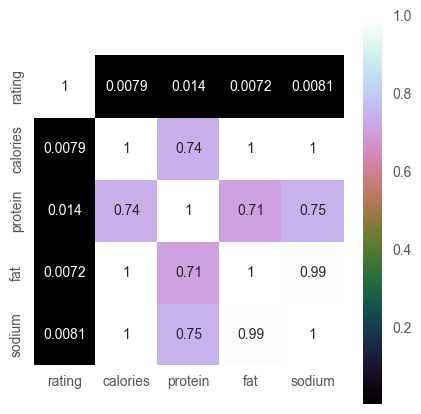

In [153]:
corr = df.iloc[:, 1:6].corr()
plt.figure(figsize=(5, 5))
sns.heatmap(corr, vmax=1, square=True,annot=True,cmap='cubehelix')

In [155]:
cor_dict = corr['protein'].to_dict()
del cor_dict['protein']
print("List the numerical features decendingly by their correlation with Protein:\n")
for ele in sorted(cor_dict.items(), key = lambda x: -abs(x[1])):
    print("{0}: \t{1}".format(*ele))

List the numerical features decendingly by their correlation with Protein:

sodium: 	0.7492865810748386
calories: 	0.7428158481088419
fat: 	0.7121938623158276
rating: 	0.013970568366160188


Hence, recipes with high protein also have high amount of sodium,calories, fat. is this beacuse high-protein foods are very frequently high-fat foods: meat, milk, and cheeses. 

As 1 gram of protein = 4 calories and 1 gram of fat = 9 cals
, we can understand the relationship.

##### What is the composition of vegetarian and non-vegetarian recipes in 5 start rating?

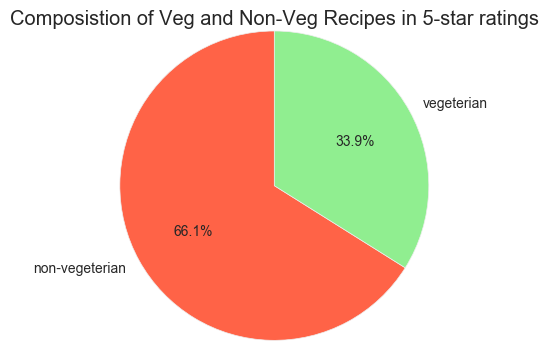

In [156]:
recipes_5 = train[train["rating"] == 5]
veg_nv = recipes_5.groupby(["vegetarian"])["title"].count()
plt.figure(figsize=(4,4))
plt.pie(veg_nv,labels=["non-vegeterian","vegeterian"],autopct='%1.1f%%', startangle=90, colors=["tomato","lightgreen"])
plt.axis("equal")
plt.title("Composistion of Veg and Non-Veg Recipes in 5-star ratings")

Non-Veg Recipes have more 5star rating than Veg Recipes .

###### What are common fruits used in 5 star rated recipes?

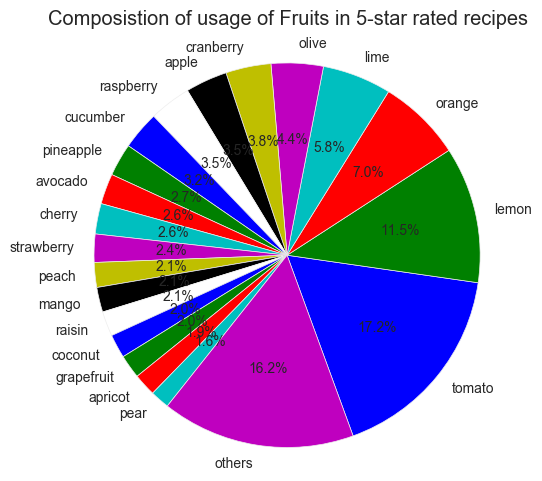

In [158]:
fruit = ["Apple","Apricot","Avocado","Banana","Bilberry","Blackberry","Blackcurrant","Blueberry","Boysenberry","Currant","Cherry","Cherimoya","Cloudberry","Coconut","Cranberry","Cucumber","Custard apple","Damson","Date","Dragonfruit","Durian","Elderberry","Feijoa","Fig","Goji berry","Gooseberry","Grape","Raisin","Grapefruit","Guava","Honeyberry","Huckleberry","Jabuticaba","Jackfruit","Jambul","Jujube","Juniper berry","Kiwifruit","Kumquat","Lemon","Lime","Loquat","Longan","Lychee","Mango","Marionberry","Melon","Cantaloupe","Honeydew","Watermelon","Miracle fruit","Mulberry","Nectarine","Nance","Olive","Orange","Blood orange","Clementine","Mandarine","Tangerine","Papaya","Passionfruit","Peach","Pear","Persimmon","Physalis","Plantain","Plum","Prune (dried plum)","Pineapple","Plumcot (or Pluot)","Pomegranate","Pomelo","Purple mangosteen","Quince","Raspberry","Salmonberry","Rambutan","Redcurrant","Salal berry","Salak","Satsuma","Star fruit","Strawberry","Tamarillo","Tamarind","Tomato","Ugli fruit","Yuzu"]
fruit = [x.lower() for x in fruit]
dd =train[train.vegetarian==0 ][train.rating == 5.0][list(set(fruit).intersection(train.columns.tolist()))].sum(axis=0).sort_values(ascending=False)
dx = dd[:20]
dx["others"]= dd[20:].sum()
plt.figure(figsize=(5,5))
plt.pie(dx,labels=dx.index,autopct='%1.1f%%', startangle=290)
plt.axis("equal")
plt.title("Composistion of usage of Fruits in 5-star rated recipes", y =1.08)